In [83]:
!pip3 install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [84]:
!tar -xvf test_technique.tar.gz

Test_Technique_Image/
Test_Technique_Image/._.DS_Store
tar: Ignoring unknown extended header keyword 'LIBARCHIVE.xattr.com.apple.FinderInfo'
Test_Technique_Image/.DS_Store
Test_Technique_Image/._Deep Learning for Medical Images Technical Test_2023.pdf
tar: Ignoring unknown extended header keyword 'LIBARCHIVE.xattr.com.microsoft.defender.dlp.marker#C'
tar: Ignoring unknown extended header keyword 'LIBARCHIVE.xattr.com.apple.quarantine'
tar: Ignoring unknown extended header keyword 'LIBARCHIVE.xattr.com.apple.metadata:_kMDItemUserTags'
tar: Ignoring unknown extended header keyword 'LIBARCHIVE.xattr.com.apple.macl'
tar: Ignoring unknown extended header keyword 'LIBARCHIVE.xattr.com.apple.lastuseddate#PS'
tar: Ignoring unknown extended header keyword 'LIBARCHIVE.xattr.com.apple.FinderInfo'
Test_Technique_Image/Deep Learning for Medical Images Technical Test_2023.pdf
Test_Technique_Image/._Neuroflux_disorder
tar: Ignoring unknown extended header keyword 'LIBARCHIVE.xattr.com.apple.quarantin

In [85]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2 as cv
from collections import Counter
import seaborn as sns

In [86]:
print(tf.__version__)


2.9.2


In [102]:
!find Test_Technique_Image/Neuroflux_disorder/* ! -name *.jpg -type f | xargs rm
!find Test_Technique_Image/Neuroflux_disorder -name '\.*' -type f | xargs rm

rm: missing operand
Try 'rm --help' for more information.


In [103]:
classes = os.listdir(path)
classes

['PTE', 'LO', 'IO', 'EO', 'IPTE']

In [104]:
path = os.path.abspath('./Test_Technique_Image/Neuroflux_disorder')

image_size = (256, 256)
batch_size = 32


train_ds = tf.keras.utils.image_dataset_from_directory(
    path,
    validation_split=0.2,
    subset="training",
    seed=1024,
    image_size=image_size,
    batch_size=batch_size,
    follow_links=False
    )

validation_ds = tf.keras.utils.image_dataset_from_directory(
    path,
    validation_split=0.2,
    subset="validation",
    seed=1024,
    image_size=image_size,
    batch_size=batch_size,
    follow_links=False
    )

Found 1296 files belonging to 5 classes.
Using 1037 files for training.
Found 1296 files belonging to 5 classes.
Using 259 files for validation.


In [105]:
classes = os.listdir(path)
classes

['PTE', 'LO', 'IO', 'EO', 'IPTE']

In [106]:
counts = {}
for c in classes:
    counts[c] = len(os.listdir(os.path.join(path, c)))

In [107]:
classes_and_number = sorted(counts.items(), key = lambda x: x[1], reverse = True)
print("Liste des classes et leur représentation dans le dataset :\n")
print(classes_and_number)
print("\n")

Liste des classes et leur représentation dans le dataset :

[('PTE', 580), ('LO', 240), ('EO', 233), ('IPTE', 171), ('IO', 72)]




In [112]:
for data, labels in train_ds.take(1):
  print(data.shape)
  print(labels.shape)

(32, 256, 256, 3)
(32,)


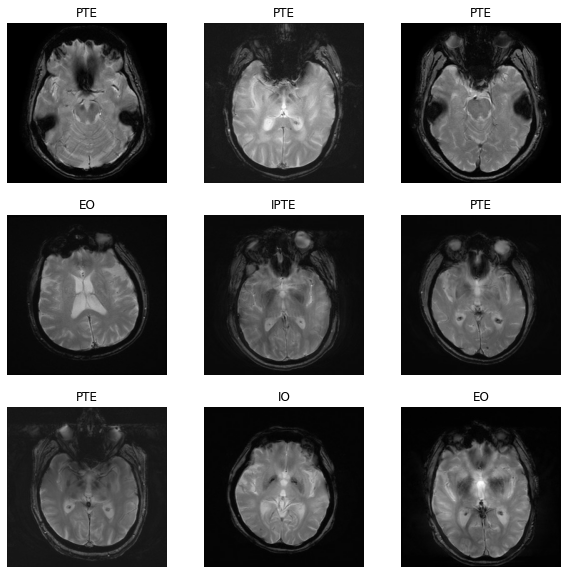

In [113]:
class_names = train_ds.class_names
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

**DATA AUGMENTATION**

In [115]:
import tensorflow as tf
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Rescaling, Layer, BatchNormalization

flip = Sequential(
    [
        layers.RandomFlip("horizontal"),
    ]
)
rot = Sequential(
    [
        layers.RandomRotation(0.5),
    ]
)

augmented_rot = train_ds.map(
  lambda x, y: (rot(x, training=True), y))

augmented_flip = train_ds.map(
  lambda x, y: (flip(x, training=True), y))

augmented_train_ds = train_ds.concatenate(augmented_flip).concatenate(augmented_rot)
